Cargar el dataset FuelConsumptionCo2.csv en numpy

lo habitual es cargarlo con pandas

## CARGA DE DATOS

Lo hace cargando con 
* pickle.load
* numpy.genfromtxt

con Pandas sería más sencillo, no tendríamos que cargar cada columna, tendremos un dataframe

In [1]:
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import scipy
from scipy import stats

#import random
import pickle as pkl

In [2]:
with open("../Data/FUELCONSUMPTION_CITY.pkl", "br") as f:
    city_consumption = pkl.load(f)
    
city_consumption

array([ 9.9, 11.2,  6. , ..., 13.4, 12.9, 14.9], shape=(1067,))

In [3]:
print(city_consumption.dtype)

float64


In [4]:

# Cargamos la columna 8 del CSV en un array de numpy: es la columna de consumo de combustible por ciudad
# city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1) # float64
city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
manufacturers = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)

city_consumption
road_consumption

array([ 6.7,  7.7,  5.8, ...,  9.8,  9.3, 10.2],
      shape=(1067,), dtype=float32)

In [5]:
print(city_consumption.dtype)
print(city_consumption.shape)

float32
(1067,)


In [6]:
manufacturers

array(['ACURA', 'ACURA', 'ACURA', ..., 'VOLVO', 'VOLVO', 'VOLVO'],
      shape=(1067,), dtype='<U13')

In [7]:
print(manufacturers.dtype)
print(manufacturers.shape)

<U13
(1067,)


##  MEDIA, calculado con numpy, sin bucles

In [8]:
print(f"Consumo medio en ciudad: {np.mean(city_consumption)}")
print(f"Consumo medio en carretera: {np.mean(road_consumption)}")



print(f"Consumo medio en ciudad: {np.mean(city_consumption)}")
print(f"Consumo medio en ciudad: {np.around(np.mean(city_consumption), 2)}")
print(f"Consumo medio en ciudad: {round(np.mean(city_consumption), 2)}")


print(f"Consumo medio en ciudad: {np.mean(city_consumption)}")
print(f"Consumo medio en ciudad: {np.around(np.mean(city_consumption), 2):.2f}")
print(f"Consumo medio en ciudad: {round(np.mean(city_consumption), 2):.2f}")

Consumo medio en ciudad: 13.29653263092041
Consumo medio en carretera: 9.474601745605469
Consumo medio en ciudad: 13.29653263092041
Consumo medio en ciudad: 13.300000190734863
Consumo medio en ciudad: 13.300000190734863
Consumo medio en ciudad: 13.29653263092041
Consumo medio en ciudad: 13.30
Consumo medio en ciudad: 13.30


## MEDIANA

In [9]:
print(f"Mediana de combustible en ciudad: {np.median(city_consumption)}")
print(f"Mediana de combustible en carretera: {np.median(road_consumption)}")



Mediana de combustible en ciudad: 12.600000381469727
Mediana de combustible en carretera: 8.800000190734863


## MÁXIMO Y MÍNIMO


In [10]:
print(f"Coche que más combustible consume en ciudad: {np.max(city_consumption)}")
print(f"Coche que más combustible consume en carretera: {np.max(road_consumption)}")


Coche que más combustible consume en ciudad: 30.200000762939453
Coche que más combustible consume en carretera: 20.5


In [11]:
print(f"Coche que menos combustible consume en ciudad: {np.min(city_consumption)}")
print(f"Coche que menos combustible consume en carretera: {np.min(road_consumption)}")


Coche que menos combustible consume en ciudad: 4.599999904632568
Coche que menos combustible consume en carretera: 4.900000095367432


## HISTOGRAMA

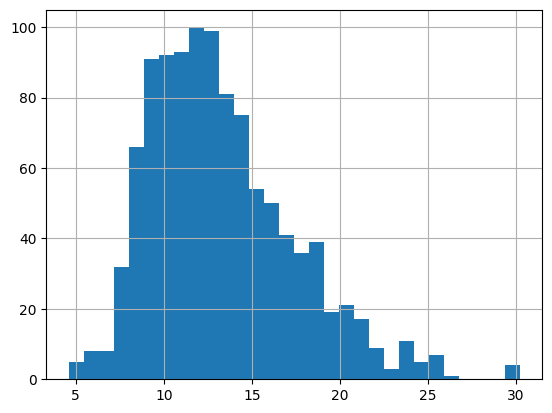

In [12]:
plt.hist(city_consumption, bins=30)

plt.grid()

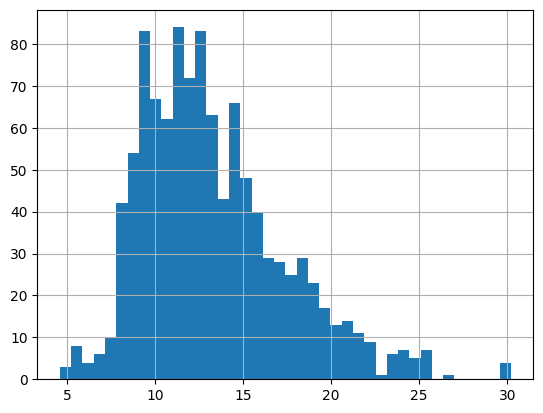

In [13]:
plt.hist(city_consumption, bins=40);
plt.grid()

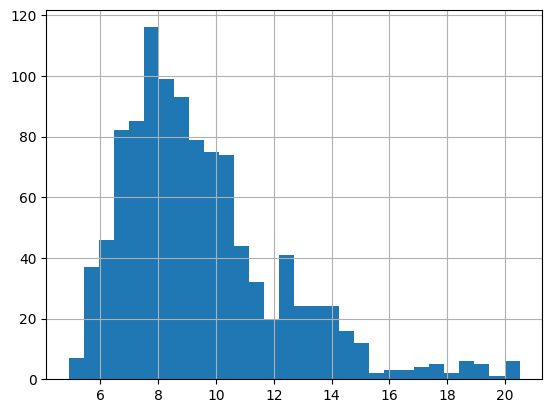

In [14]:
plt.hist(road_consumption, bins=30)
plt.grid()

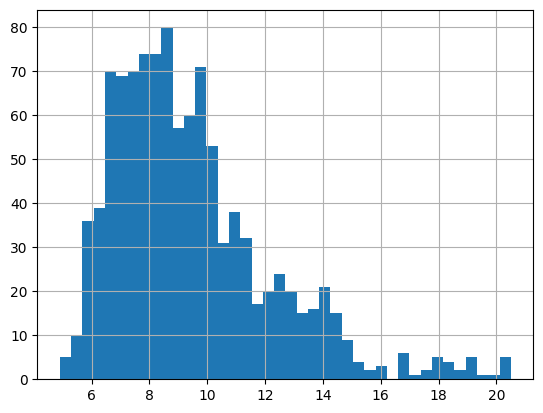

In [15]:
plt.hist(road_consumption, bins=40);
plt.grid()

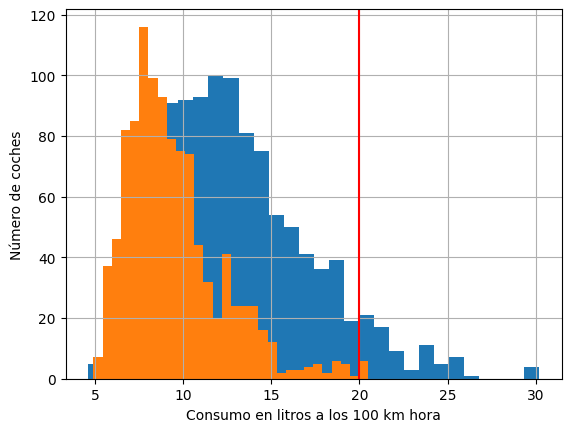

In [16]:
# superponer los gráficos
plt.hist(city_consumption, bins=30)
plt.hist(road_consumption, bins=30)
plt.xlabel("Consumo en litros a los 100 km hora")
plt.ylabel("Número de coches")
plt.axvline(20, color='red') # Limite de compra
plt.grid()

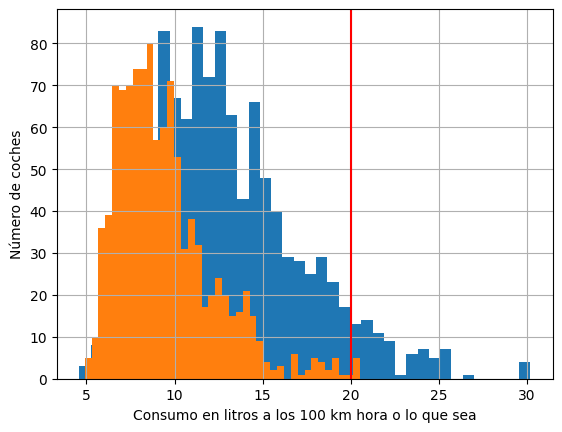

In [17]:
plt.hist(city_consumption, bins=40);
plt.hist(road_consumption, bins=40);
plt.xlabel("Consumo en litros a los 100 km hora o lo que sea")
plt.ylabel("Número de coches")
plt.axvline(20, color='red') # limite de compra 
plt.grid()

## CUARTILES

* Q1 25%
* Q2 50% (= mediana)
* Q3 75%

In [18]:

print(np.quantile(a = city_consumption, 
            q = 0.5,   # 50% === mediana sirve para calcular valores anómalos
            interpolation = "lower"))
# print(np.quantile(a = city_consumption, q = 0.5, interpolation = "lower"))

print(np.median(city_consumption))



12.6
12.6


In [19]:
print(np.quantile(a = city_consumption, 
            q = [0.25, 0.50, 0.75],
            interpolation = "lower"))
#print(np.quantile(a = city_consumption, q = [0.25, 0.50, 0.75], interpolation = "lower"))

# primer quartil (Q1): 10.2 L/ 100 km - El 25% de los coches consumen menos de 10,2 litros
# Mediana (Q2): 12,6 L / 100 km - El 50% de los coches consumen menos de 12,6 litros
# Tercer cuartil (Q3): 15,5 L / 100 km - El 75% de los coches consumen menos de 15,5 litros
# Esto nos intereasa para poder detectar calores anómalis o que están muy alejados del 50% de los datos


[10.2 12.6 15.5]


In [20]:


# numeros = [0.10 ,0.20, 0.30 ,0.40, 0.50]
# for i in numeros:
#    percentage = np.quantile(a = city_consumption, q = i, interpolation = "lower")
#    if percentage >= 8:
#        break
    

In [21]:
# np.where
# Filtros: máscara booleana
city_consumption[city_consumption >= 26]
# df[df["city_consumption"] >= 26]

array([30. , 30.2, 26.7, 30. , 30.2], dtype=float32)

In [22]:
# rango
print(f"Rango consumo ciudad: {np.max(city_consumption) - np.min(city_consumption)}")
print(f"Rango consumo carretera: {np.max(road_consumption) - np.min(city_consumption)}")


Rango consumo ciudad: 25.600000381469727
Rango consumo carretera: 15.899999618530273


## IQR: Rango Intercuartílico

* Q3 - Q1

Nos puede servir para filtrar outliers / atípicos.

In [23]:
# rango intercuartilico IQR: am,plitud entre el primer cuartil (Q1) y el tercer quartil (Q3): Vemos la variabilidad central de los datos
# lo usaremos para calcular valores que sean anómalos, que están myuy alejados de ese 50% central de los datos
# como están distribuidos los datos alrededor de la mediana
# 1.5 veces el IQR alejado se puede considerar un outlier o valor anómalo

print(np.quantile(a = city_consumption, q = [0.25], interpolation = "lower"))
print(np.quantile(a = city_consumption, q = [0.50], interpolation = "lower"))
print(np.quantile(a = city_consumption, q = [0.75], interpolation = "lower"))

Q1 = np.quantile(a = city_consumption, q = [0.25], interpolation = "lower")
Q2 = np.quantile(a = city_consumption, q = [0.50], interpolation = "lower")
Q3 = np.quantile(a = city_consumption, q = [0.75], interpolation = "lower")

IQR = Q3 - Q1
print(IQR)

# def remove_outliers(array):
    

[10.2]
[12.6]
[15.5]
[5.3]


10.2
15.5


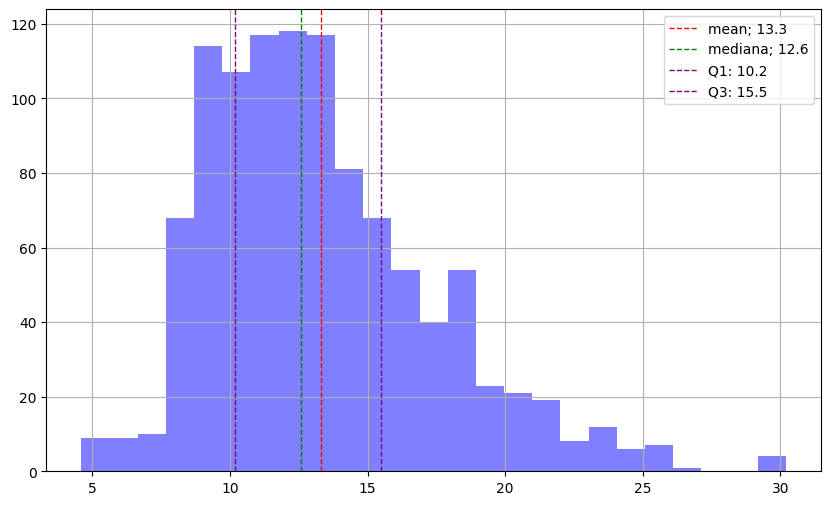

In [24]:
# pintar media, mediana, q1, q3, min, max en un histograma
city_mean = np.mean(city_consumption)
city_median = np.median(city_consumption)
city_min = np.min(city_consumption)
city_max = np.max(city_consumption)
city_q1 = np.quantile(a = city_consumption, q = 0.25, interpolation = "lower")
city_q3 = np.quantile(a = city_consumption, q = 0.75, interpolation = "lower")

print(city_q1)
print(city_q3)

plt.figure(figsize=(10, 6))
plt.hist(city_consumption, bins=25, color='blue', alpha=0.5)
plt.axvline(city_mean, color='red', linestyle='dashed', linewidth=1, label=f'mean; {city_mean:.1f}')
plt.axvline(city_median, color='green', linestyle='dashed', linewidth=1, label=f'mediana; {city_median:.1f}')
#plt.axvline(city_min, color='black', linestyle='dashed', linewidth=1, label=f'min; {city_min:.1f}')
#plt.axvline(city_max, color='black', linestyle='dashed', linewidth=1, label=f'max; {city_max:.1f}')
plt.axvline(city_q1, color='purple', linestyle='dashed', linewidth=1, label=f'Q1: {city_q1:.1f}')
plt.axvline(city_q3, color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {city_q3:.1f}')
plt.legend()
plt.grid()
plt.show()


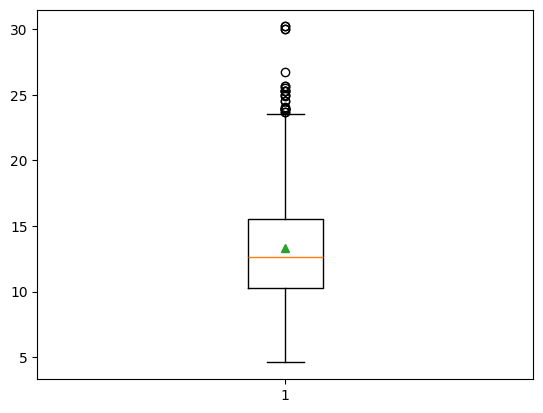

In [25]:
# boxplot
# calcula y muestra la mediana, la media, rango IQR
# los puntos negros serían valores anómalos, outliers
# punto y coma se pone al final para evitar que muestre textos encima del grafico, solo cuando es la ultima linea de la celda (y solo para Jupyter)
plt.boxplot(city_consumption, showmeans=True);

## FILTRAR DATOS

In [26]:
# Filtrar usando percentiles
# distintos medios (alias) de hacer lo mismo
# print(np.quantile(city_consumption, 0.5))
# print(np.percentile(city_consumption, 50))

# filtramos un porcentaje de los coches
percentil_10 = np.percentile(city_consumption, 10)
percentil_90 = np.percentile(city_consumption, 90)
print(f"percentil_10: {percentil_10}")
print(f"percentil_90: {percentil_90}")

#Coches en el 10% inferior (10% de coches que menos consumen)
coches_menor_consumo = city_consumption[city_consumption <= percentil_10]

# 10% de coches que más consumen
coches_mayor_consumo = city_consumption[city_consumption >= percentil_90]

print("10 % coches menor consumo")
print(coches_menor_consumo.shape)
print(f"media: {np.mean(coches_menor_consumo)}")
print("10 % coches mayor consumo")
print(coches_mayor_consumo.shape)
print(f"media: {np.mean(coches_mayor_consumo)}")


percentil_10: 8.699999809265137
percentil_90: 18.799999237060547
10 % coches menor consumo
(114,)
media: 7.8307013511657715
10 % coches mayor consumo
(115,)
media: 21.574783325195312


## DISPERSIÓN

* Se usa normalmente la desviación estándar: std

In [27]:
# Varianza: mide la dispersion de los consumos con respecto a la media
np.var(city_consumption)

np.float32(16.804516)

In [28]:
# desviacion estandar: raiz cuadrada de la varianza, 
# permite una mejor interpretación ya que estaría en las mismas unidades
np.std(city_consumption)
# de media, los consumops se desvian 4,1 litros de la media 

np.float32(4.0993314)

In [29]:
manufacturers

array(['ACURA', 'ACURA', 'ACURA', ..., 'VOLVO', 'VOLVO', 'VOLVO'],
      shape=(1067,), dtype='<U13')

## MODA

In [30]:
from collections import Counter
contador = Counter(manufacturers) # obtenemos como un diccionario
contador.items()

# contador.most_common(5)  
# da los 5 fabricantes de coches más comunes en este dataset

# 10 mas frecuentes
# Mostrar los 10 fabricantes que más coches tienen en este dataset
top_10 = contador.most_common(10)
for fabricante, count in top_10:
    print(f"Fabricante {fabricante} tiene {count} coches")

# podemos hacer una grafica con plt.bar
# en pandas sería: sns.countplot()

# 10 menos frecuentes
manufaturers_sorted = sorted(contador.items(), key=lambda item: item[1])
manufaturers_sorted[:10]
# 10 mas frecuentes:
# manufaturers_sorted = sorted(contador.items(), key=lambda item: item[1], reverse=True)

Fabricante FORD tiene 90 coches
Fabricante CHEVROLET tiene 86 coches
Fabricante BMW tiene 64 coches
Fabricante MERCEDES-BENZ tiene 59 coches
Fabricante AUDI tiene 49 coches
Fabricante GMC tiene 49 coches
Fabricante TOYOTA tiene 49 coches
Fabricante PORSCHE tiene 44 coches
Fabricante VOLKSWAGEN tiene 42 coches
Fabricante DODGE tiene 39 coches


[(np.str_('SMART'), 2),
 (np.str_('SRT'), 2),
 (np.str_('LAMBORGHINI'), 3),
 (np.str_('MASERATI'), 6),
 (np.str_('ASTON MARTIN'), 7),
 (np.str_('ROLLS-ROYCE'), 7),
 (np.str_('BENTLEY'), 8),
 (np.str_('SCION'), 9),
 (np.str_('FIAT'), 10),
 (np.str_('LINCOLN'), 11)]

In [31]:
from collections import Counter
contador = Counter(manufacturers)
contador.items()
for i in contador.items():
    print(f"{i[0]} {i[1]}")

#for fabricante, count in contador:
#    print(f"Fabricante {fabricante} tiene {count} coches")
    


ACURA 12
ASTON MARTIN 7
AUDI 49
BENTLEY 8
BMW 64
BUICK 16
CADILLAC 32
CHEVROLET 86
CHRYSLER 19
DODGE 39
FIAT 10
FORD 90
GMC 49
HONDA 21
HYUNDAI 24
INFINITI 21
JAGUAR 22
JEEP 31
KIA 33
LAMBORGHINI 3
LAND ROVER 19
LEXUS 22
LINCOLN 11
MASERATI 6
MAZDA 27
MERCEDES-BENZ 59
MINI 36
MITSUBISHI 16
NISSAN 33
PORSCHE 44
RAM 13
ROLLS-ROYCE 7
SCION 9
SMART 2
SRT 2
SUBARU 23
TOYOTA 49
VOLKSWAGEN 42
VOLVO 11


In [32]:
for position, vehicle in enumerate(contador.items()):    
    
    if 20 > position > 10:
        print(f"{vehicle[0]} {vehicle[1]}")

FORD 90
GMC 49
HONDA 21
HYUNDAI 24
INFINITI 21
JAGUAR 22
JEEP 31
KIA 33
LAMBORGHINI 3


In [33]:
top_10

[(np.str_('FORD'), 90),
 (np.str_('CHEVROLET'), 86),
 (np.str_('BMW'), 64),
 (np.str_('MERCEDES-BENZ'), 59),
 (np.str_('AUDI'), 49),
 (np.str_('GMC'), 49),
 (np.str_('TOYOTA'), 49),
 (np.str_('PORSCHE'), 44),
 (np.str_('VOLKSWAGEN'), 42),
 (np.str_('DODGE'), 39)]

In [34]:
# plt.bar()
fabricantes, conteos = zip(*top_10) # tb lo podemos sacar en la celda anterior, dentro del blcle, haciendo append a una lista de cada
# se puede con un for guardando en dos listas independientes

print(fabricantes)
print(conteos)


(np.str_('FORD'), np.str_('CHEVROLET'), np.str_('BMW'), np.str_('MERCEDES-BENZ'), np.str_('AUDI'), np.str_('GMC'), np.str_('TOYOTA'), np.str_('PORSCHE'), np.str_('VOLKSWAGEN'), np.str_('DODGE'))
(90, 86, 64, 59, 49, 49, 49, 44, 42, 39)


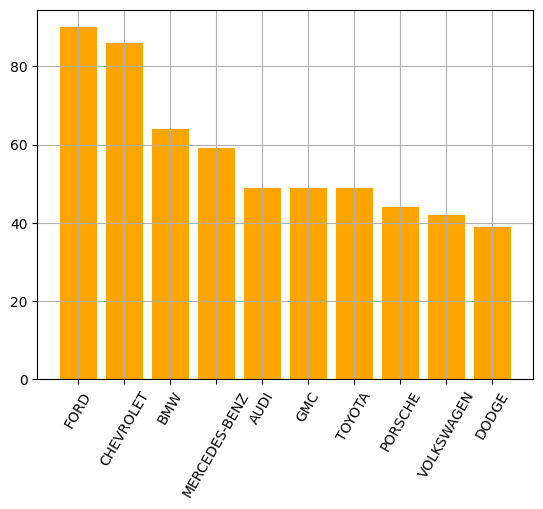

In [35]:
#plt.figure(figsize=(12, 8))
plt.bar(fabricantes, conteos, color='orange')
plt.xticks(rotation=60);

plt.grid()


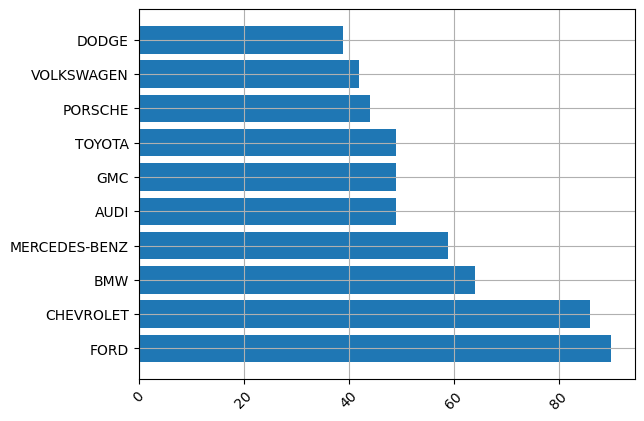

In [36]:
#plt.figure(figsize=(12, 8))
plt.barh(fabricantes, conteos)
plt.xticks(rotation=45);
plt.grid()


In [37]:
conteos

(90, 86, 64, 59, 49, 49, 49, 44, 42, 39)

## To-Do Moda de cilindros

In [38]:
'''# moda de manufacturers
stats.mode(manufacturers)'''


'# moda de manufacturers\nstats.mode(manufacturers)'

## FILTRO OUTLIERS CON IQR

In [39]:
# metodo para ver outliers (lo debemos guardar en un archivo llamado estadísticas.py)

def filtrar_outliers(array, k=1.5): # k es el multiplicador del rango intercuartil
    # array_copy = array.copy()
    # calcular el Q1
    Q1 = np.percentile(array, 25)
    # calcular el Q3
    Q3 = np.percentile(array, 75)
    # calcular IQR
    IQR = Q3 - Q1
    # Calcular limites inferior y superior: 1.5 veces el IQR
    limite_inferior = Q1 - IQR * k
    # limite_inferior = Q1 - IQR * 1.0 (podemos bajar (acercar al centro) el valor del limite inferior, 
    # ya que no tenemos valores por debajo de 5)
    print(f"límite inferior {limite_inferior}")
    
    limite_superior = Q3 + IQR * k
    print(f"límite superior {limite_superior}")

    # Filtro sobre array de 1.5 veces el IQR para limite inferior y limite superior
    array_sin_outliers = array[(array >= limite_inferior) & (array < limite_superior) ]
    # retornar array_filtrado
    return array_sin_outliers
    

In [40]:
print(city_consumption.shape) # 1067
filtrados = filtrar_outliers(city_consumption)
city_consumption_sin_outliers = filtrar_outliers(city_consumption)
print(city_consumption_sin_outliers.shape) 

(1067,)
límite inferior 2.299999713897705
límite superior 23.5
límite inferior 2.299999713897705
límite superior 23.5
(1039,)


In [41]:
# array_sin_outliers = filtrar_outliers(city_consumption)
city_consumption_no_outliers = filtrar_outliers(city_consumption, k=1.5)
print(city_consumption.shape) # 1067
print(city_consumption_no_outliers.shape) # 1041

límite inferior 2.299999713897705
límite superior 23.5
(1067,)
(1039,)


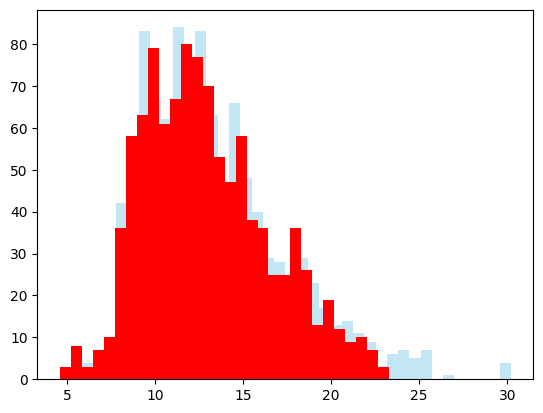

In [42]:
plt.hist(city_consumption, bins = 40, color = "skyblue", alpha=0.5)
plt.hist(city_consumption_no_outliers, bins = 30, color = "red");

(array([ 3.,  2.,  4.,  3.,  2.,  4.,  4.,  1., 20., 24., 47., 13., 51.,
        45., 44., 35., 37., 44., 51., 41., 39., 49., 45., 33., 34., 38.,
        19., 40., 26., 20., 20., 16., 19., 22.,  9., 16., 22., 20.,  8.,
         9., 10., 11.,  6.,  4.,  9.,  8.,  6.,  3.,  1.,  2.]),
 array([ 4.5999999 ,  4.97399998,  5.34800005,  5.72200012,  6.09599972,
         6.46999979,  6.84399986,  7.21799946,  7.59200001,  7.9659996 ,
         8.34000015,  8.71399975,  9.08799934,  9.46199989,  9.83599949,
        10.20999908, 10.58399963, 10.95800018, 11.33199978, 11.70599937,
        12.07999992, 12.45399952, 12.82799911, 13.20199966, 13.57600021,
        13.94999886, 14.3239994 , 14.69799995, 15.0719986 , 15.44599915,
        15.81999969, 16.19400024, 16.56799889, 16.94199944, 17.31599998,
        17.68999863, 18.06399918, 18.43799973, 18.81199837, 19.18599892,
        19.55999947, 19.93400002, 20.30799866, 20.68199921, 21.05599976,
        21.43000031, 21.80399895, 22.1779995 , 22.55200005,

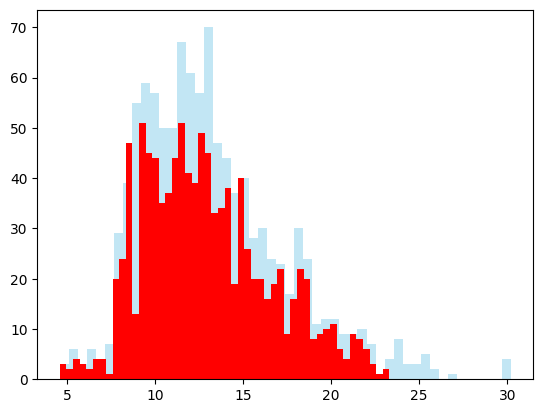

In [43]:
plt.hist(city_consumption, bins = 50, color = "skyblue", alpha = 0.5)
plt.hist(city_consumption_sin_outliers, bins = 50, color = "red")


el city_consumption tenemos más datos que en city_consumption_no_outliers, por lo que al pintarlos en un histograma las frecuencias de aparacición son diferentes porque se calculan sobre el total.

Trabaja con frecuencias de aparición.

## VISTAS VS. COPIAS (a raíz de una duda de clase)

In [44]:
# VISTAS: REFERENCIAS AL MISMO ARRAY ORIGINAL 
# POR LO QUE MODIFICAS UNA VISTA MODIFICAS EL ARRAY ORIGINAL:
# crear una vista:
array = np.array([1,2,3,4,5])
vista = array[:2] #slicing, devuelve una vista, sin cambiar el array original, 
# apunta al mismo array pero no es una copia
print(f"array: {array}")
print(f"array_vista: {vista}")

vista[0] = 666 # modificamos la vista y se modifica el array !!!
print(f"array: {array}") # ha sido modificado
print(f"array_vista: {vista}") # ha sido modificado

array: [1 2 3 4 5]
array_vista: [1 2]
array: [666   2   3   4   5]
array_vista: [666   2]


In [45]:
# COPIA DE UN ARRAY, SI LO MODIFICO, NO MODIFICA EL ARRAY ORIGINAL
# filtro de máscara booleana
array = np.array([10,20,30,40,50])
array_filtrado = array[(array >= 15) & (array <= 45)] # crea una copia, NO una vista

print(f"array: {array}")
print(f"array_filtrado: {array_filtrado}")

array_filtrado[0] = 666 # modifica la copia, no afecta al original
print(f"array: {array}")
print(f"array_filtrado: {array_filtrado}") # Vemos que solo modifica la copia, y no el original 


array: [10 20 30 40 50]
array_filtrado: [20 30 40]
array: [10 20 30 40 50]
array_filtrado: [666  30  40]


In [46]:
array = np.array([10,20,30,40,50])
array_copia = array[(array >= 15) & (array <= 45)] # crea una copia, NO una vista

print(f"array: {array}")
print(f"array_filtrado: {array_filtrado}")

array_filtrado[0] = 666 # modifica la copia, no afecta al original
print(f"array: {array}")
print(f"array_filtrado: {array_filtrado}") # Vemos que solo modifica la copia, y no el original 


array: [10 20 30 40 50]
array_filtrado: [666  30  40]
array: [10 20 30 40 50]
array_filtrado: [666  30  40]


## CORRELACIÓN

In [47]:
'''city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1,)
road_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1,)
co2_emissions = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(12), delimiter=",", skip_header=1,)
engine_cc = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(4), delimiter=",", skip_header=1,)
cylinders = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(5), delimiter=",", skip_header=1, dtype=np.int8)

print(co2_emissions)
print(engine_cc)
print(cylinders)'''

'city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1,)\nroad_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1,)\nco2_emissions = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(12), delimiter=",", skip_header=1,)\nengine_cc = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(4), delimiter=",", skip_header=1,)\ncylinders = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(5), delimiter=",", skip_header=1, dtype=np.int8)\n\nprint(co2_emissions)\nprint(engine_cc)\nprint(cylinders)'

In [48]:

city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
co2_emissions = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(12), delimiter=",", skip_header=1, dtype=np.float32)
engine_cc = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(4), delimiter=",", skip_header=1, dtype=np.float32)
cylinders = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(5), delimiter=",", skip_header=1, dtype=np.int8)

print(co2_emissions)
print(engine_cc)
print(cylinders)


[196. 221. 136. ... 271. 260. 294.]
[2.  2.4 1.5 ... 3.  3.2 3.2]
[4 4 4 ... 6 6 6]


In [49]:
stats.pearsonr(cylinders, city_consumption)[0]

np.float64(0.7964725642795258)

* 1: relación lineal positiva (correlación positiva)
* 0: no hay correlación
* -1: correlación negativa

0,79 lo interpretariamos como que hay una correlación positiva entre cilindros y consumo de combustible en ciudadas

Es decir, que cuanto más cilindros mayor consumo.

In [50]:
# calcular todas las correlaciones para la columna cylinder
print(f" cylinders / cilinders {stats.pearsonr(cylinders, cylinders)[0]}") # 1 porque es la misma variable 
print(f" cylinders / city consumption {stats.pearsonr(cylinders, city_consumption)[0]}")
print(f" cylinders / roas_consumption {stats.pearsonr(cylinders, road_consumption)[0]}") # 1 porque es la misma variable 
print(f" cylinders / engine_cc {stats.pearsonr(cylinders, engine_cc)[0]}")
print(f" cylinders / co2_emissions {stats.pearsonr(cylinders, co2_emissions)[0]}") # 1 porque es la misma variable 
#print(f" cylinders / city consumption {stats.pearsonr(cylinders, city_consumption)[0]}")


 cylinders / cilinders 1.0
 cylinders / city consumption 0.7964725642795258
 cylinders / roas_consumption 0.7245935094435936
 cylinders / engine_cc 0.9340105308708644
 cylinders / co2_emissions 0.8496844776288413


In [51]:
# calcular todas las correlaciones para la columna cylinder
print(f" co2_emissions / cilinders {stats.pearsonr(co2_emissions, cylinders)[0]}") # 1 porque es la misma variable 
print(f" co2_emissions / city consumption {stats.pearsonr(co2_emissions, city_consumption)[0]}")
print(f" co2_emissions / roas_consumption {stats.pearsonr(co2_emissions, road_consumption)[0]}") # 1 porque es la misma variable 
print(f" co2_emissions / engine_cc {stats.pearsonr(co2_emissions, engine_cc)[0]}")
print(f" co2_emissions / co2_emissions {stats.pearsonr(co2_emissions, co2_emissions)[0]}") # 1 porque es la misma variable 
#print(f" co2_emissions / city consumption {stats.pearsonr(co2_emissions, city_consumption)[0]}")



 co2_emissions / cilinders 0.8496844868028859
 co2_emissions / city consumption 0.89803846285443
 co2_emissions / roas_consumption 0.861747933020979
 co2_emissions / engine_cc 0.8741544083855217
 co2_emissions / co2_emissions 0.9999999198823106


In [52]:
columnas = [engine_cc, city_consumption, road_consumption, cylinders, co2_emissions] # 5 columnas del CSV que pasamos a un array

matriz_lista = list()

# podemos hacer un for para interrelacionar las columnas, o usar pandas
for columna1 in columnas:
    
    fila = list()
    
    for columna2 in columnas:
        
        fila.append(stats.pearsonr(columna1, columna2)[0])
        
    matriz_lista.append(fila)
     
print(matriz_lista)    
matriz = np.array(matriz_lista)
print(matriz) 
   
# hemos creado la matriz de correlación
    


[[np.float64(1.0), np.float64(0.8322250494246379), np.float64(0.7787458875124571), np.float64(0.9340105270091499), np.float64(0.8741544071955047)], [np.float64(0.8322250531876723), np.float64(0.9999999615632298), np.float64(0.9657182387984191), np.float64(0.7964725757058204), np.float64(0.8980384653142615)], [np.float64(0.7787458898276327), np.float64(0.965718233673889), np.float64(1.0), np.float64(0.7245935229932456), np.float64(0.8617479378537354)], [np.float64(0.9340105308708644), np.float64(0.7964725642795258), np.float64(0.7245935094435936), np.float64(1.0), np.float64(0.8496844776288413)], [np.float64(0.8741544083855217), np.float64(0.89803846285443), np.float64(0.861747933020979), np.float64(0.8496844868028859), np.float64(0.9999999198823106)]]
[[1.         0.83222505 0.77874589 0.93401053 0.87415441]
 [0.83222505 0.99999996 0.96571824 0.79647258 0.89803847]
 [0.77874589 0.96571823 1.         0.72459352 0.86174794]
 [0.93401053 0.79647256 0.72459351 1.         0.84968448]
 [0.87

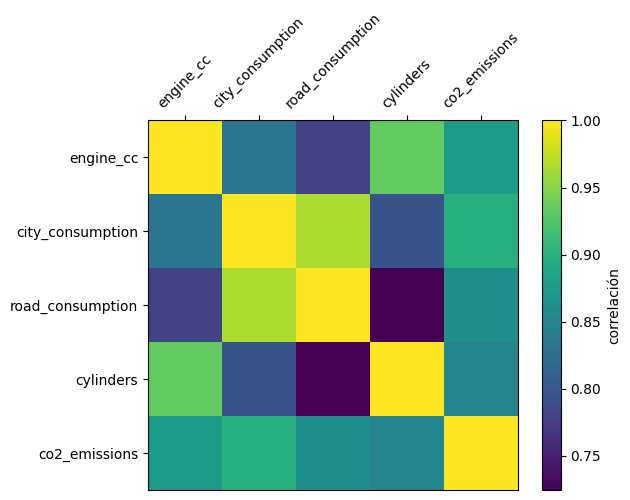

In [53]:
column_names = ['engine_cc', 'city_consumption', 'road_consumption', 'cylinders', 'co2_emissions']

#plt.imshow(matriz, cmap='inferno')
#plt.imshow(matriz)
#plt.imshow(matriz, cmap='viridis', vmin=-1, vmax=1)
plt.imshow(matriz, cmap='viridis')
plt.colorbar(label='correlación')
plt.xticks(range(len(column_names)), column_names, rotation=45)
plt.yticks(range(len(column_names)), column_names)
plt.gca().xaxis.set_ticks_position('top')




<Axes: >

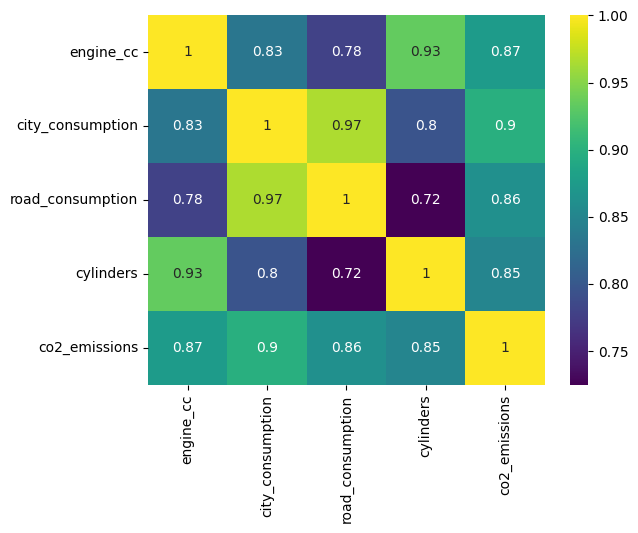

In [54]:
# pip install seaborn
# seaborn da más cosas hechas que matplotlib
import seaborn as sns
sns.heatmap(matriz, annot=True, cmap='viridis', xticklabels=column_names, yticklabels=column_names)


## ESTANDARIZACIÓN

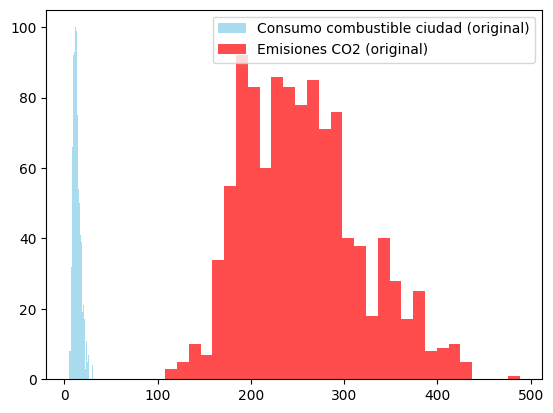

In [55]:
# plt.figure(figsize = (12, 10))

plt.hist(city_consumption, bins=30, color="skyblue", alpha=0.7, label="Consumo combustible ciudad (original)");
plt.hist(co2_emissions, bins=30, color="red", alpha=0.7, label="Emisiones CO2 (original)")
plt.legend();


In [56]:
# estandarizar y volver a pintar el histograma
mean_city_consumption = np.mean(city_consumption)
mean_co2_emissions = np.mean(co2_emissions)

median_city_consumption = np.median(city_consumption)
median_co2_emissions = np.median(co2_emissions)

std_city_consumption = np.std(city_consumption)
std_co2_emissions = np.std(co2_emissions)

print(f"Media original city_consumption: {mean_city_consumption}")
print(f"Mediana original city_consumption: {median_city_consumption}")
print(f"Desviación estandar original city_consumptions: {std_city_consumption}")

print(f"Media original co2_emissions: {mean_co2_emissions}")
print(f"Mediana original co2_emisiions: {median_co2_emissions}")
print(f"Desviación estandar original co2_emissions: {std_co2_emissions}")

#print(f"Moda: {stats.mode(sample)[0]}")

#print(f"std: {np.std(sample)}")
#plt.hist(city_consumption, bins=30, color="skyblue", alpha=0.7, label="Consumo combustible ciudad (original)")
#plt.hist(co2_emissions, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (original)")
#plt.legend();

Media original city_consumption: 13.29653263092041
Mediana original city_consumption: 12.600000381469727
Desviación estandar original city_consumptions: 4.099331378936768
Media original co2_emissions: 256.2286682128906
Mediana original co2_emisiions: 251.0
Desviación estandar original co2_emissions: 63.34259796142578


In [57]:
city_consumption_standard = (city_consumption - mean_city_consumption) / std_city_consumption
co2_emissions_standard = (co2_emissions - mean_co2_emissions) / std_co2_emissions

print(city_consumption_standard[:5]) #mostramos los 5 primeros valores
print(co2_emissions_standard[:5])


[-0.8285578  -0.5114329  -1.7799324  -0.14551954 -0.29188472]
[-0.9508399  -0.55616075 -1.8980697  -0.01939719 -0.19305599]


In [58]:
# estandarizar y volver a pintar el histograma
mean_city_consumption = np.mean(city_consumption_standard)
mean_co2_emissions = np.mean(co2_emissions_standard)

median_city_consumption = np.median(city_consumption_standard)
median_co2_emissions = np.median(co2_emissions_standard)

std_city_consumption = np.std(city_consumption_standard)
std_co2_emissions = np.std(co2_emissions_standard)

print(f"Media estandarizado city_consumption: {mean_city_consumption}")
print(f"Mediana estandarizado city_consumption: {median_city_consumption}")
print(f"Desviación estandarizado original city_consumptions: {std_city_consumption}")

print(f"Media estandarizado co2_emissions: {mean_co2_emissions}")
print(f"Mediana estandarizado co2_emisiions: {median_co2_emissions}")
print(f"Desviación estandarizado original co2_emissions: {std_co2_emissions}")

#print(f"Moda: {stats.mode(sample)[0]}")

#print(f"std: {np.std(sample)}")
#plt.hist(city_consumption, bins=30, color="skyblue", alpha=0.7, label="Consumo combustible ciudad (original)")
#plt.hist(co2_emissions, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (original)")
#plt.legend();

Media estandarizado city_consumption: -7.150323000360004e-08
Mediana estandarizado city_consumption: -0.1699136197566986
Desviación estandarizado original city_consumptions: 0.9999999403953552
Media estandarizado co2_emissions: 1.6445743256099377e-07
Mediana estandarizado co2_emisiions: -0.08254584670066833
Desviación estandarizado original co2_emissions: 1.0


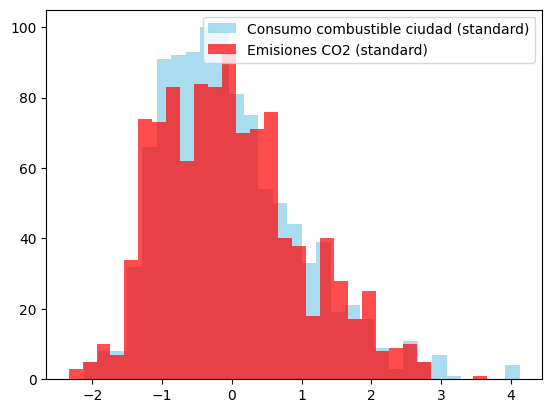

In [59]:

plt.hist(city_consumption_standard, bins=30, color="skyblue", alpha=0.7, label="Consumo combustible ciudad (standard)")
plt.hist(co2_emissions_standard, bins=30, color="red", alpha=0.7, label="Emisiones CO2 (standard)")
plt.legend();

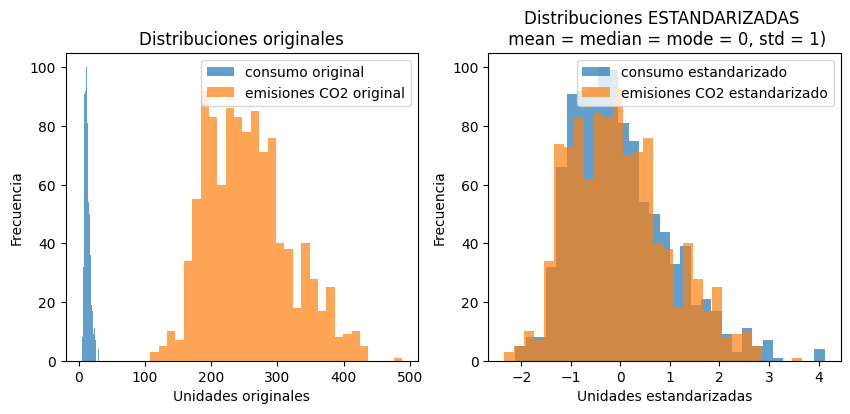

In [60]:
# opcional: mostrar los dos gráficos juntos
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1) # Primer gráfico
plt.hist(city_consumption, bins=30, alpha=0.7, label='consumo original')
plt.hist(co2_emissions, bins=30, alpha=0.7, label='emisiones CO2 original')
plt.title("Distribuciones originales")
plt.xlabel("Unidades originales")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(1,2,2) # Segundo gráfico
plt.hist(city_consumption_standard, bins=30, alpha=0.7, label='consumo estandarizado')
plt.hist(co2_emissions_standard, bins=30, alpha=0.7, label='emisiones CO2 estandarizado')
plt.title("Distribuciones ESTANDARIZADAS \n mean = median = mode = 0, std = 1)")
plt.xlabel("Unidades estandarizadas")
plt.ylabel("Frecuencia")
plt.legend();


## ASIMETRÍA Y CURTOSIS

In [61]:
# coeficiente de asimetría (Skewness)

print(f"Coeficiente de asimetría city_consumption: {stats.skew(city_consumption)}")
print(f"Coeficiente de asimetría co2_emissions: {stats.skew(co2_emissions)}")



Coeficiente de asimetría city_consumption: 0.8993620872497559
Coeficiente de asimetría co2_emissions: 0.5187845230102539


Interpretación:

* Cercano a 0 es que no hay asimetría, es decir, que la distribución es simétrica, OK.
* Si es positivo o negativo formaría una cola

In [62]:
# curtosis: con stats.kurtosis

print(f"Curtosis city_consumption: {stats.kurtosis(city_consumption)}")
print(f"Curtosis co2_emissions: {stats.kurtosis(co2_emissions)}")

Curtosis city_consumption: 0.9413409233093262
Curtosis co2_emissions: -0.11465811729431152


Interpretación:
    
1. Leptocúrtica ($k_3 > 0$): Decaimiento rápido, cola ligera.
2. Mesocúrtica ($k_3=0$): Curva normal.
3. Paticúrtica ($k_3<0$ ): Decaimiento lento.

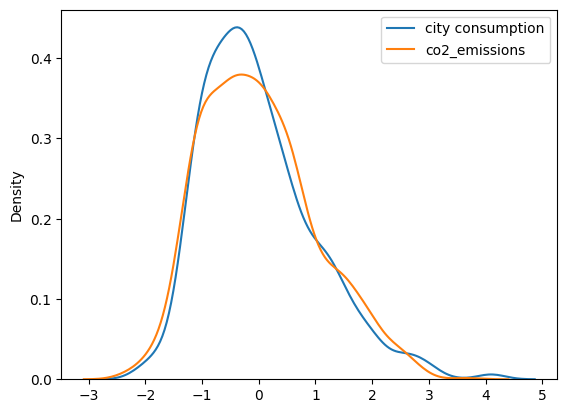

In [63]:
sns.kdeplot(city_consumption_standard, label='city consumption')
sns.kdeplot(co2_emissions_standard, label='co2_emissions')
plt.legend();

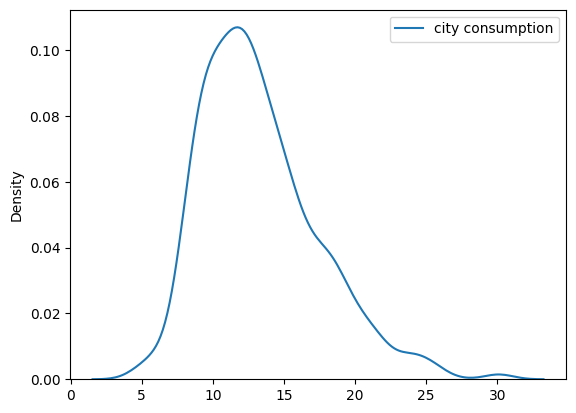

In [64]:
sns.kdeplot(city_consumption, label='city consumption')
plt.legend();

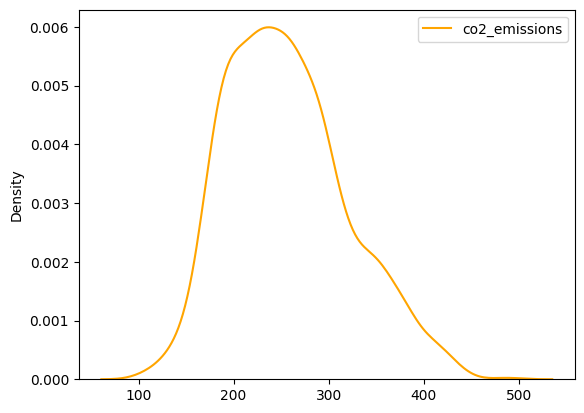

In [ ]:
sns.kdeplot(co2_emissions, label='co2_emissions', color='orange')
# plt.plot(co2_emissions, label="co2_emissions", color='orange') # este no serviría para pintar el histograma en curva
plt.legend();

Text(0.5, 1.0, 'Comparación de asimtrías')

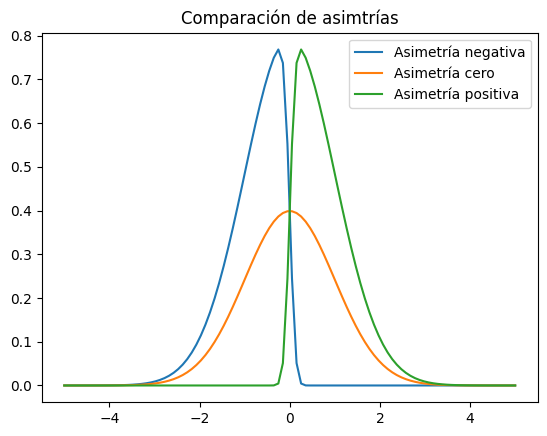

In [66]:
# ilustrar asimetría negativa, cero y positiva:
# opcional 
# generar datos ficticios
from scipy.stats import skewnorm

x = np.linspace(-5, 5, 100)

negative_skew = skewnorm.pdf(x, a=-10) # a < 0 para asimetría negatica
zero_skew = skewnorm.pdf(x, a=0) # a = 0 para simetría perfecta
positive_skew = skewnorm.pdf(x, a=10) # a > 0 para asimetría positiva

plt.plot(x, negative_skew, label='Asimetría negativa')
plt.plot(x, zero_skew, label='Asimetría cero') # campana de Gauss
plt.plot(x, positive_skew, label='Asimetría positiva')
plt.legend()
plt.title("Comparación de asimtrías")



Text(0.5, 1.0, 'Curtosis')

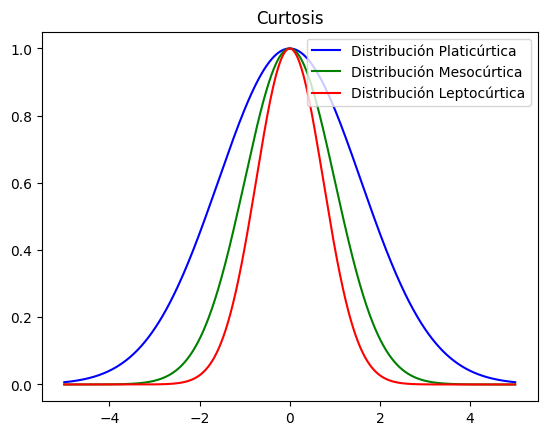

In [80]:
# ilustrar kurtosis negativa, cero y positiva, con datos ficticios

x = np.linspace(-5, 5, 1000)

platicurtic = np.exp(-0.2 * x**2) # para crear una función cuadrática, más aplanada (Menos que cero)
mesocurtic = np.exp(-0.5 * x**2) # estandar (0)
leptocurtic = np.exp(-0.9 * x**2) # más alta, en pico (Mayor que cero) 

plt.plot(x, platicurtic, color="blue", label="Distribución Platicúrtica")
plt.plot(x, mesocurtic, color="green", label="Distribución Mesocúrtica")
plt.plot(x, leptocurtic, color="red", label="Distribución Leptocúrtica")
plt.legend()
plt.title("Curtosis")

## Transformar distribuciones de datos

* np.sqrt (suave)
* np.log (fuerte)

In [68]:
# Transformación de datos: no se trata de escalar datos, sino de alterar su forma atenuando el impacto de los valores outliers

# Función Raíz: más suave que la logarítnica, ayuda a reducir la asimetría, pero en menor media que la logarítmica
city_consumption_sqrt = np.sqrt(city_consumption)
co2_emissions_sqrt = np.sqrt(co2_emissions)

# Función logaritmo: comprime las diferencias entre valores grandes y valores pequeños. Más útil cuando hay un sesgo hacia valores grandes. Es más fuerte que la sqrt
city_consumption_log = np.log(city_consumption)
co2_emissions_log = np.log(co2_emissions)

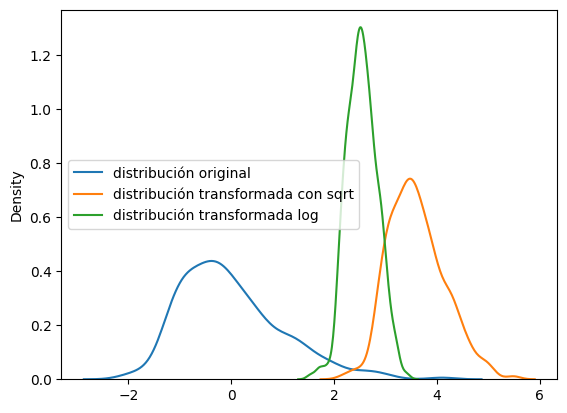

In [81]:
sns.kdeplot(city_consumption_standard, label="distribución original") # tienen la distribución original
sns.kdeplot(city_consumption_sqrt, label="distribución transformada con sqrt") # se corrige (mitiga sin borrarlos) el impacto de los outliers
sns.kdeplot(city_consumption_log, label="distribución transformada log") # se corrige el impacto de los outliers
plt.legend();


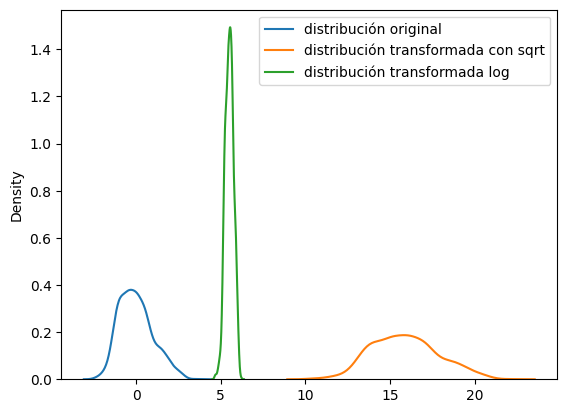

In [ ]:
sns.kdeplot(co2_emissions_standard, label="distribución original") # tienen la distribución original
sns.kdeplot(co2_emissions_sqrt, label="distribución transformada con sqrt") # se corrige (mitiga sin borrarlos) el impacto de los outliers
sns.kdeplot(co2_emissions_log, label="distribución transformada log") # se corrige el impacto de los outliers
plt.legend();



* **La estandarización** de los datos no cambian, solo se colocan en una escala en torno al 0, para compararlos con otros datos.
Pero la distribución original se mantiene, es decir, si hay simetría la seguirá habiendo, no la corrige.

* **Transformación de distribución de datos**: Para corregir la asimetría se usa una función matemática, que puede ser la raíz, o logaritmo. Esto sí cambia la distribución porque compacta los valores, mitigando el impacto de los outliers.

Normalmente queremos hacer primero una transformación de la distribución para eliminar la asimetría y luego aplicar una estandarización para poder poner datos en una escala que se puedan comparar con otros.

Este método tiene la ventaja de que no requiere eliminar outliers, ya que los compacta y mitiga su impacto. Tiene la ventaja de que no elimina datos. El otro método de tratar outliers de Tukey SI elimina datos outliers y no quita la asimetría.



## CONTRASTE DE HIPÓTESIS

 Ejercicio 12 del nb de ejercicios 4:
- Realiza un contraste de hipótesis y comprueba si se gasta más combustible en la ciudad que en la autovía.
    - **fuel_city**: gasto en ciudad
    - **fuel_hwy**: gasto en autovía
    - $H_0$: el gasto de combustible en la ciudad es igual o menor al gasto en la autovía.
    - $H_1$: el gasto de combustible en la ciudad es mayor al gasto en la autovía.
    
_**Pista**: hay que aplicar una prueba **t de Student** para **muestras pareadas** `stats.ttest_rel()`, o una prueba **Wilcoxon** para **muestras pareadas** `stats.wilcoxon()`, dependiendo de si se cumplen los supuestos de normalidad y homogeneidad de varianzas. Pueden especificar el parámetro `alternative` con el argumento `"greater"` para un contraste de tipo `a>b`._

Son pareadas porque ambos combustibles pertenecen al mismo coche, por tanto, en realidad son datos de la misma entidad, es decir, de una misma fila.

In [71]:
print(city_consumption[:5])
print(road_consumption[:5])

[ 9.9 11.2  6.  12.7 12.1]
[6.7 7.7 5.8 9.1 8.7]


In [72]:
# establecer valor e significancia, que suele ser un numero pequeño
# nivel de significancia para aceptar o rechazar pruebas
alpha = 0.05 # es lo que se suele poner


In [73]:
# normalidad: combina skew y curtosis para saber si los datos tienen una distribución normal
# normalidad: primero debemos comprobar si los datos tienen una distribución gaussaiana. ya lo habíamos hecho, pero hay otro método:
# stats.normaltest(city_consumption) # hace un test en el que combina lo que hemos aprendido antes, la asimetría (skew) y la kurtosis (para indicar si los datos tienen una distribución normal o no)
_, p_city = stats.normaltest(city_consumption) # con el guion bajo se ignora el primer parámetro
_, p_road = stats.normaltest(road_consumption)
# se puede añadir a mayores la prueba de stats.shapiro

print("pruebas de normalidad")
print(f"p_city {p_city} y p_road {p_road}")

pruebas de normalidad
p_city 6.448322750596955e-29 y p_road 1.7367047265152944e-50


In [74]:
# homogeneidad de varianzas: es decir, que la varianza
# de city_consuption sea similar a la varianza de road_consumption
# damos salida a la comparación de estos valores con alpha
_, p_var = stats.levene(city_consumption, road_consumption)

print("pruebas de varianza")
print(f"p_var {p_var}")

pruebas de varianza
p_var 1.6747776844619997e-25


In [75]:
print(f"mean_city_consumption {np.mean(city_consumption)}")
print(f"mean_road_consumption {np.mean(road_consumption)}")
# tb las podemos restar a ver si la resta es positiva o negativa


mean_city_consumption 13.29653263092041
mean_road_consumption 9.474601745605469


In [76]:
# tb si las varianzas de ambos arrays son similares
# en caso de que si, podremos hacer la prueba t de Students; en caso contrario haremos otra
# comprobar valores p obtenidos versus significancia (a):
# se deben cumplir todas!! por eso ponemos and
suposiciones = p_city > alpha and p_road > alpha and p_var > alpha
#if p_city > alpha and p_road > alpha and p_var > alpha:
if suposiciones:
    print("Se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS")
else:
    print("NO se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS")





NO se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS


In [77]:
# contraste de hipótesis:
if suposiciones:
    #prueba paramétrica
    _, p_final = stats.ttest_rel(city_consumption, road_consumption, alternative="greater")   
else:
    # prueba no paramétrica
    _, p_final = stats.wilcoxon(city_consumption, road_consumption, alternative="greater")
    
print(f"contraste de hipótesis p-value: {p_final}")

contraste de hipótesis p-value: 2.9810270094239354e-176


In [78]:
if p_final < alpha:
    print("H1 VERDADERO (H alternativa): El consumo en city es mayor que en road. RECHAZAMOS H0 (H Nula).")
else:
    print("H0 VERDADERO (H nula): El consumo en city es menos o igual que en road. RECHAZAMOS H1 (H alternativa).")

H1 VERDADEROv (H alternativa): El conmbustible en city es mayor que en road. RECHAZAMOS H0 (H Nula).


Si p_final < alpha, la probabilidad de que el resultado sea H0 es tan pequeña que la rechazamos.

No significa que H1 sea absolutamente verdadero, sino que hay suficiente evidencia para preferir H1 en vez de H0


 Contraste de hipótesis

El contraste de hipótesis es una técnica de la estadística inferencial que nos permite tomar decisiones sobre afirmaciones o suposiciones acerca de una población, basadas en la información obtenida de una muestra de esa población.

1. Para llevar a cabo un contraste de hipótesis necesitamos primero formular dos hipótesis. La primera se conoce como hipótesis nula ($H_0$), y es una suposición o afirmación de que la condición que queremos probar o refutar no es cierta. Por ejemplo, si queremos comprobar si el cociente intelectual promedio de los alumnos de cuarto de la ESO es diferente al cociente intelectual promedio de la población general, la hipótesis nula sería que son iguales, que no existe diferencia.

    Por el contrario, tenemos también la hipótesis alternativa ($H_1$), que no es más que lo opuesto a la nula. En ese caso, la $H_1$ sería que el alumno promedio de cuarto de la ESO tiene un CI diferente (mayor o menor) que el el ciudadano promedio de España.

    El contraste de hipótesis nos permite tomar una decision al respecto de estas dos hipótesis. Nos da cierta certeza para tomar una u otra como la verdadera.

2. Esto lo conseguimos estableciendo un nivel de significancia. Es, en esencia, el nivel de confianza de los resultados del contraste. Se representa con la letra griega **alpha** $α$ y nos indica el valor máximo que aceptamos que tenga el valor $p$.
    
    Ahora, el valor $p$ representa una probabilidad. Concretamente es la probabilidad que tenemos de obtener una muestra como la que usamos en el contraste, dado que la hipótesis nula sea verdadera. En otras palabras, es un valor de confianza. Cuanto más grande el valor, más seguros podemos estar de la certeza de la hipótesis nula; y cuanto más pequeño sea, más seguros podemos estar de la hipótesis alternativa.
    
    Teniendo esto en cuenta, debemos establecer una $α$ acorde a la naturaleza del problema. En algunos contrastes, debemos ser extremadamente estrictos para afirmar la hipótesis alternativa como verdadera, por lo que debemos establecer una $α$ muy, muy baja como $0.01$ o incluso $0.001$. En la mayoría de los casos, este umbral se suele establecer en $0.05$, representando que estamos dispuestos a tomar un riesgo de, como mucho, un 5% de aceptar como verdadera la hipótesis alternativa cuando en realidad la verdadera es la nula.
    
    Este error se conoce como error de tipo I. Existe también el error de tipo II, que se comete al aceptar la hipótesis nula como verdadera, cuando realmente la verdadera es la alternativa.

| | Contraste $H_0$ | Contraste $H_1$ |
|-|--|--|
| __Real $H_0$__ | OK | Tipo I |
| __Real $H_1$__ | Tipo II | OK |

In [79]:
# def normaliza(vector):
#    vector_norm = [vector]
#    media = np.mean(vector)
#    std = np.std(vector)
#    vector_norm = [(vector - media) / std ]  # for x in vector] con Numpy no necesitamos el for, porque ya trabaja la matriz elemento a elemento

# vector = city_consumption
# print(np.array(vector_norm))